# Import libraries

In [1]:
import pandas as pd
import numpy as np
import math
import seaborn as sns
import matplotlib.pyplot as plt
import statistics as st
%matplotlib inline

# Import of data

In [2]:
# import data with supposed relationship.
# Here in example a relationship between temperature and revenue as an ice cream shop
filename = 'IceCreamData.csv'
my_csv_data = pd.read_csv(filename)
my_csv_data.head()

,Temperature,Revenue
0,24.566884,534.799028
1,26.005191,625.190122
2,27.790554,660.632289
3,20.595335,487.706960
4,11.503498,316.240194


In [3]:
# create a column with random values with non-relational data for control
from random import random
lst = []
for i in range(my_csv_data.shape[0]):
    lst.append(random())
print(len(lst))

500


In [4]:
my_csv_data['Random'] = lst*my_csv_data['Revenue']
my_csv_data['Random'] = my_csv_data['Random']*2
my_csv_data.head()

,Temperature,Revenue,Random
0,24.566884,534.799028,145.973233
1,26.005191,625.190122,764.109373
2,27.790554,660.632289,284.341937
3,20.595335,487.706960,71.223809
4,11.503498,316.240194,51.979410


In [5]:
# get some resume of main values of the data
my_csv_data.describe()

,Temperature,Revenue,Random
count,500.000000,500.000000,500.000000
mean,22.232225,521.570777,519.288816
std,8.096388,175.404751,341.360530
min,0.000000,10.000000,0.598496
25%,17.122258,405.558681,240.106742
50%,22.392791,529.368565,474.829939
75%,27.740674,642.257922,758.544827
max,45.000000,1000.000000,1692.303877


In [6]:
# get some insights of data quality
my_csv_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  500 non-null    float64
 1   Revenue      500 non-null    float64
 2   Random       500 non-null    float64
dtypes: float64(3)
memory usage: 11.8 KB


# Visuals for correlation check

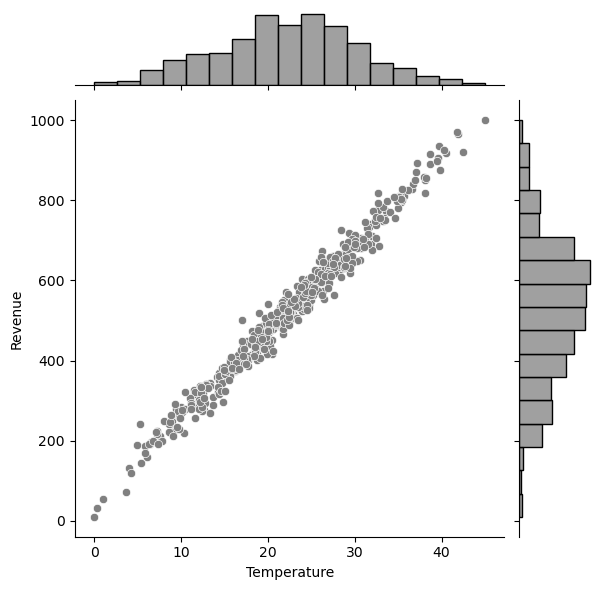

In [7]:
# for an overview check with the scatter plot, if there could be a relationship between temperature and revenue,
# also get a bar chart of the distribution
sns.jointplot(x ='Temperature',y='Revenue', data = my_csv_data, color ='gray')
plt.savefig("scatterplot_with_Jointplot.jpg")

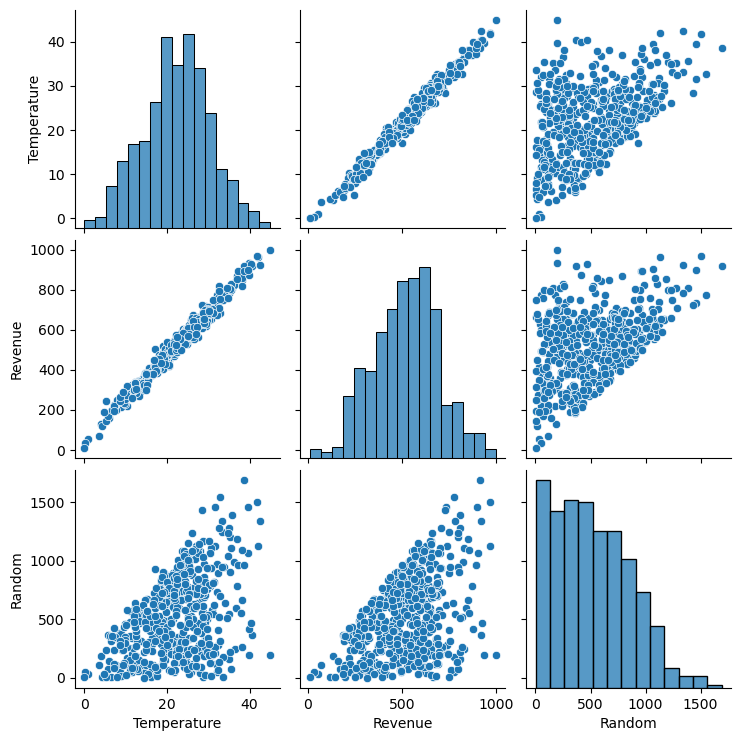

In [8]:
# Check all possible relations of the data as also with non-relational data
fig1= sns.pairplot(my_csv_data)
plt.savefig("scatterplot_with_pairplot.jpg")

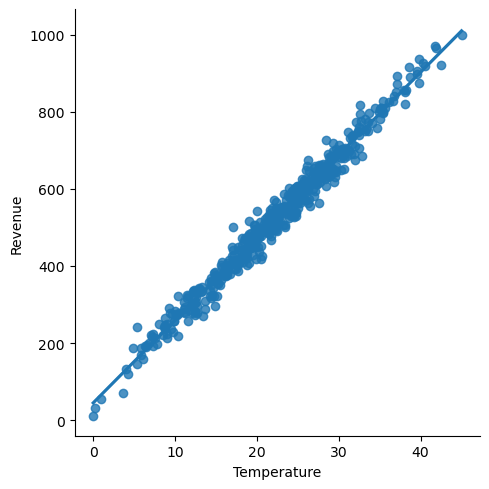

In [9]:
# setting a regression line with inbuild sns.implot
# so, that's how the linear reggression laer should seem like
sns.lmplot(x ='Temperature',y='Revenue', data = my_csv_data)

# Pearson Correlation first relation proof

In [10]:
# proof, that two columns have a correlation with pearson coefficient
# np.corrcoef(x, y)
x = np.array(my_csv_data['Temperature'])
y = np.array(my_csv_data['Revenue'])

In [11]:
# testing np.corrcoef function to get pearson coeafficient as all combination between temperature and revenue
r_x_y = np.corrcoef(x, y)
r_x_y

array([[1.       , 0.9898016],
       [0.9898016, 1.       ]])

In [12]:
# testing the .corr() method for the same
my_csv_data.corr()

,Temperature,Revenue,Random
Temperature,1.000000,0.989802,0.432353
Revenue,0.989802,1.000000,0.436073
Random,0.432353,0.436073,1.000000


In [13]:
# the math on pearson correlation coefficient
n=len(x)
r_x_y_m = (n*sum(x*y)-sum(x)*sum(y))/(math.sqrt(n*sum(x**2)-sum(x)**2)*math.sqrt(n*sum(y**2)-sum(y)**2))
r_x_y_m

0.9898015963401795

# First way of linear regression with math

In [14]:
# first dataset: Temperature and Revenue
first_dataset = pd.DataFrame([my_csv_data['Temperature'],my_csv_data['Revenue']]).T
first_dataset.head()

,Temperature,Revenue
0,24.566884,534.799028
1,26.005191,625.190122
2,27.790554,660.632289
3,20.595335,487.706960
4,11.503498,316.240194


In [15]:
# Define the function for the line of linear regression, x~independent Variable, y~dependent variable
def lin_reg(x,y):
    m=(n*sum(x*y)-sum(x)*sum(y))/(n*sum(x**2)-sum(x)**2)
    b = (sum(y)-m*sum(x))/n
    z = pd.DataFrame([x,m*x+b]).T
    z.columns = [z.columns[0],'Prognostic']
    return z

In [16]:
# how do the values of the regression line look like
lin_reg(my_csv_data['Temperature'],my_csv_data['Revenue']).head()

,Temperature,Prognostic
0,24.566884,571.634337
1,26.005191,602.476847
2,27.790554,640.761497
3,20.595335,486.469919
4,11.503498,291.507963


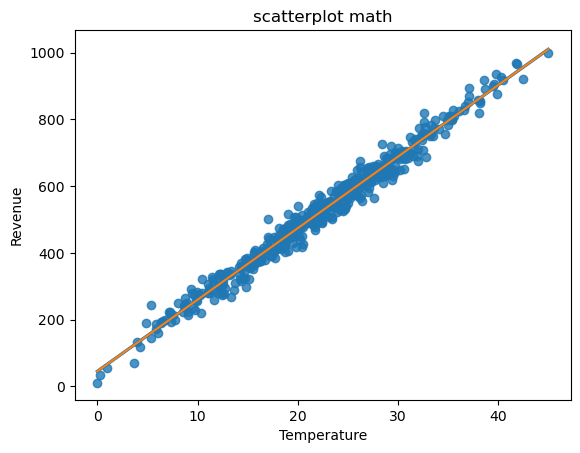

In [17]:
# does the function lin_reg(x,y) work?
sns.regplot(data = first_dataset, x = 'Temperature', y= 'Revenue')
sns.lineplot(data = lin_reg(my_csv_data['Temperature'],my_csv_data['Revenue']),x = 'Temperature',y ='Prognostic')
plt.title('scatterplot math')
plt.savefig("scatterplot_with_math_linear_regression.jpg")

In [18]:
# Function of linear regression to get m and b for y = m*x +b
def lin_reg_m_b(x,y):
    m=(n*sum(x*y)-sum(x)*sum(y))/(n*sum(x**2)-sum(x)**2)
    b = (sum(y)-m*sum(x))/n
    return [m,b]

In [19]:
# Prognostic function
m = lin_reg_m_b(x,y)[0]
b = lin_reg_m_b(x,y)[1]
def lin_reg_prog(x):
    return m*x+b

In [20]:
# temperatur 41°C should lead to a revenue of ...
lin_reg_prog(41)

924.0199130284545

# Who good are our prognostic's with regression ?

In [21]:
# define clear the function for the regression line
def reg_line_ice(x):
    [m,b]=lin_reg_m_b(my_csv_data['Temperature'],my_csv_data['Revenue'])
    return m*x+b

In [22]:
# define clear the function for the regression line for the random values
def reg_line_ice_control(x):
    [m,b]=lin_reg_m_b(my_csv_data['Temperature'],my_csv_data['Random'])
    return m*x+b

## residual / Residuen

In [23]:
# exemple 41°C
my_csv_data.loc[41,:]

Temperature      8.755554
Revenue        242.236208
Random         385.417728
Name: 41, dtype: float64

In [24]:
# one residual e_i is the difference between the given data and prognostic
e_1 = my_csv_data.loc[41,:]['Revenue']-reg_line_ice(my_csv_data.loc[41,:]['Temperature'])
e_1

9.65412142440357

In [25]:
# the sum of residuals is 0 because of the definition of regression line
round(sum(pd.array(my_csv_data['Revenue'])-pd.array(reg_line_ice(my_csv_data['Temperature']))),9)
# here because of rounding floats because of limited bits, this is inaccurate beginning by decimal number 10

0.0

## MSE / Mean squared error / mittlerer quadratischer Fehler

In [26]:
# square residual, meaning: 
# desviance is shown heavy through square - so big residuals get bigger square results,
# but less relation for calculating or getting a sense of the desviance of one datapoint
e_1 = (my_csv_data.loc[41,:]['Revenue']-reg_line_ice(my_csv_data.loc[41,:]['Temperature']))**2
e_1

93.20206047712801

In [27]:
# MSE is just the mean over the square residuals:
round(st.mean((pd.array(my_csv_data['Revenue'])-pd.array(reg_line_ice(my_csv_data['Temperature'])))**2),14)
# MSE is more sensitive to outliers

623.0963653020005

In [28]:
# comparing MSE of the data with the MSE of the non-relational data
round(st.mean((pd.array(my_csv_data['Random'])-pd.array(reg_line_ice_control(my_csv_data['Temperature'])))**2),14)

94555.2327349296

## MAE / mean absolut error / mittlere absolute Fehler

In [29]:
# absolute residual, meaning:
# less sensitive for big residuals, but meaningfull for one data as the normal desviance between regression line and data
e_1 = abs(my_csv_data.loc[41,:]['Revenue']-reg_line_ice(my_csv_data.loc[41,:]['Temperature']))
e_1

9.65412142440357

In [30]:
# MSA is just the mean over the absolute residual:
# data values differ in about this value at mean from linear regression
round(st.mean(abs(pd.array(my_csv_data['Revenue'])-pd.array(reg_line_ice(my_csv_data['Temperature'])))),14)

19.5858612062001

In [31]:
# comparing MSA of the data with the MSA of the non-relational data
round(st.mean(abs(pd.array(my_csv_data['Random'])-pd.array(reg_line_ice_control(my_csv_data['Temperature'])))),14)

256.34978435693444

## Coefficient of Determination

In [32]:
# coefficient of determination has a relation to the pearson coefficient by simple models
r = my_csv_data.corr()
r

,Temperature,Revenue,Random
Temperature,1.000000,0.989802,0.432353
Revenue,0.989802,1.000000,0.436073
Random,0.432353,0.436073,1.000000


In [33]:
# for simple models like linear regression the coefficient of determination is the square pearson-coefficient
r_sq = r**2
r_sq

,Temperature,Revenue,Random
Temperature,1.000000,0.979707,0.186929
Revenue,0.979707,1.000000,0.190160
Random,0.186929,0.190160,1.000000


In [34]:
# making a copy of the data for merging mean and linear regression to the table and later getting back to original data
data1 = my_csv_data.copy()

## Calculating the coefficient of determination with math

In [35]:
# first step of calculating the coefficient of determination: merging mean and linear regression to the table
data1['lin Regression'] = reg_line_ice(data1['Temperature'])
data1['mean'] = data1['Revenue'].mean()
data1.head()

,Temperature,Revenue,Random,lin Regression,mean
0,24.566884,534.799028,145.973233,571.634337,521.570777
1,26.005191,625.190122,764.109373,602.476847,521.570777
2,27.790554,660.632289,284.341937,640.761497,521.570777
3,20.595335,487.706960,71.223809,486.469919,521.570777
4,11.503498,316.240194,51.979410,291.507963,521.570777


In [36]:
# So, the coefficient of determination is the portion that is distinct from mean at square residuals
# SQR: Sum of square residuals
SQR = sum((data1['Revenue']-data1['lin Regression'])**2)
# TQS: Total sum of square of difference between the data and the the mean
TQS = sum((data1['Revenue']-data1['mean'])**2)

In [37]:
SQR

311548.1826510003

In [38]:
TQS

15352646.478365654

In [39]:
# last step of calculating the coefficient of determination 
1-SQR/TQS

0.979707200117581

In [40]:
# comparing the real calculation of the coefficient of determination with with the square pearson coefficient
r_sq

,Temperature,Revenue,Random
Temperature,1.000000,0.979707,0.186929
Revenue,0.979707,1.000000,0.190160
Random,0.186929,0.190160,1.000000


## RMSE / Root mean square error

In [41]:
# RMSE = sqrt(MSE) 
math.sqrt(st.mean((pd.array(data1['Revenue'])-pd.array(reg_line_ice(data1['Temperature'])))**2))

24.961898271205268

## Getting 68% of data in a visual (95% and 99,7% also possible)

In [42]:
# corridor [regression-RSME,regression+RSME] has 68% of data (95% in 2 times and 99,7% by 3 times following calculation)
data1['upper_limit'] = data1['lin Regression'] + math.sqrt(st.mean((pd.array(data1['Revenue'])-pd.array(reg_line_ice(data1['Temperature'])))**2))
data1['lower_limit'] = data1['lin Regression'] - math.sqrt(st.mean((pd.array(data1['Revenue'])-pd.array(reg_line_ice(data1['Temperature'])))**2))

In [43]:
data1.head()

,Temperature,Revenue,Random,lin Regression,mean,upper_limit,lower_limit
0,24.566884,534.799028,145.973233,571.634337,521.570777,596.596235,546.672438
1,26.005191,625.190122,764.109373,602.476847,521.570777,627.438746,577.514949
2,27.790554,660.632289,284.341937,640.761497,521.570777,665.723395,615.799599
3,20.595335,487.706960,71.223809,486.469919,521.570777,511.431817,461.508021
4,11.503498,316.240194,51.979410,291.507963,521.570777,316.469861,266.546064


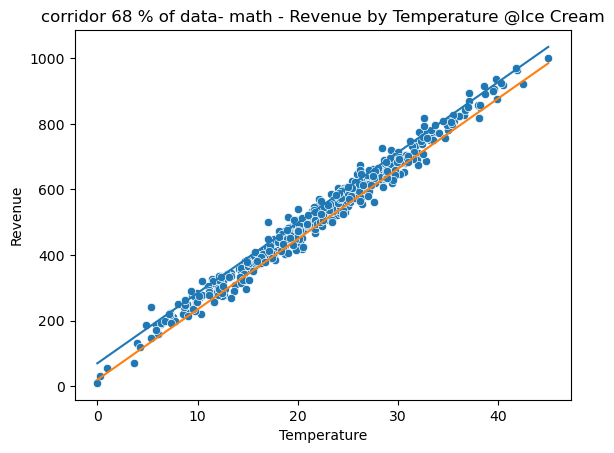

In [44]:
# ploting the corridor around
sns.scatterplot(data = data1, x = 'Temperature', y= 'Revenue')
sns.lineplot(data = data1,x = 'Temperature',y = 'upper_limit')
sns.lineplot(data = data1,x = 'Temperature',y = 'lower_limit')
plt.title('corridor 68 % of data- math - Revenue by Temperature @Ice Cream')
plt.savefig("scatterplot_with_corridor_68%_data_math.jpg")

In [45]:
List =[]
for i in range(data1.shape[0]):
    if data1['lower_limit'][i]<=data1['Revenue'][i]<=data1['upper_limit'][i]:
        List.append(data1['Revenue'][i])

In [46]:
len(List)/data1.shape[0]

0.684

# Second way taking on Machine learning for linear regression

##  2.Step import dataset and analyse data

In [47]:
# getting back two the original data
my_csv_data.head()

,Temperature,Revenue,Random
0,24.566884,534.799028,145.973233
1,26.005191,625.190122,764.109373
2,27.790554,660.632289,284.341937
3,20.595335,487.706960,71.223809
4,11.503498,316.240194,51.979410


## 3.Step Visualize Dataset
## 4.Step: Create 75% training data set and 25%test data

In [48]:
# x~independent variable Temperature y~dependent variable Revenue
# important is, that X is 1 dimension greater as y
X=my_csv_data[['Temperature']]
y=my_csv_data.loc[:,['Revenue','Random']]

In [49]:
# we have no missing data as prooven in 1.step, so we can go a head
# import library to divide in train and test dataset
from sklearn.model_selection import train_test_split

In [50]:
# this spilts the data automaticaly and shuffles it
# X=x,y=y, test_size~part of dataset normaly 25%, 
# "random_state = 42" means that shuffle will have always same output on any machine
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [51]:
# temperature train dataset
X_train.shape

(375, 1)

In [52]:
# temperature test dataset
X_test.shape

(125, 1)

In [53]:
# revenue train dataset
y_train.shape

(375, 2)

In [54]:
# revenue testt dataset
y_test.shape

(125, 2)

# 5.Step: Train the Model

In [55]:
# import of the classifier LinearRegression
from sklearn.linear_model import LinearRegression

In [56]:
# we define the Machine Learning operator "regressor"
#fit_intercept = True, means the we have a y-axes interseption distinct to 0 and we order to become b from y = m*x+b
regressor = LinearRegression(fit_intercept = True)

In [57]:
# We put the machine learning operator to train for fitting optimal the training data
regressor.fit(X_train,y_train)

LinearRegression()

In [58]:
# output: y = m*x+b
print('Linear Model Coefficient (m): ', regressor.coef_)
print('Linear Model Coefficient (b): ', regressor.intercept_)

Linear Model Coefficient (m):  [[21.31003911]
 [17.71944373]]
Linear Model Coefficient (b):  [ 46.74912594 121.69891609]


# 6.Step: Testing Model

In [59]:
# all artificial intelligence is stored in regressor
# now we make a prediction over the remaining test data
# putting in X testing values we are going to get y-values based on the modell m=21.38... and b = 46.81...
y_predict = regressor.predict(X_test)
y_predict.shape

(125, 2)

In [60]:
# prediction and tet data for revenue have the same shape, so we can proceed
y_test.shape

(125, 2)

In [61]:
# split the revenue data for plot
y_train_revenue = y_train.iloc[:,0]
y_train_random = y_train.iloc[:,1]

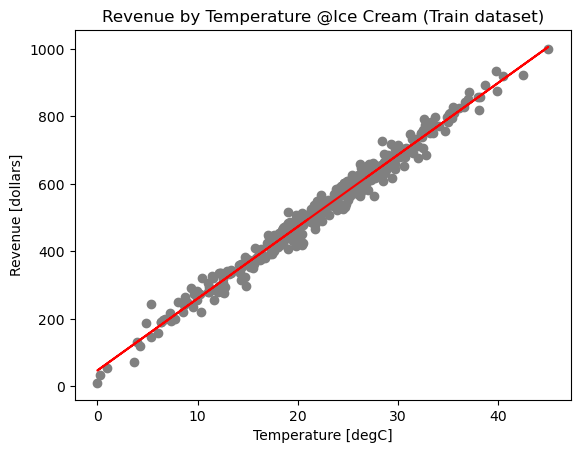

In [62]:
# y_predict should predict y_test
# so we watch the visualization of y_test
plt.scatter(X_train, y_train_revenue, color = 'gray')
# we plot now the prediction line from our modell to see how it fits on the training data
plt.plot(X_train, regressor.predict(X_train)[:,0], color = 'red')
plt.ylabel('Revenue [dollars]')
plt.xlabel('Temperature [degC]')
plt.title('Revenue by Temperature @Ice Cream (Train dataset)')
plt.savefig("ML_scatterplot_train_data.jpg")
# through definition it is the best line for represantation of the data in our model

In [63]:
# now wesplitthe test data aswell
y_predict_revenue= y_predict[:,0]
y_predict_random= y_predict[:,1]

In [64]:
y_test_revenue = y_test.iloc[:,0]
y_test_random = y_test.iloc[:,1]

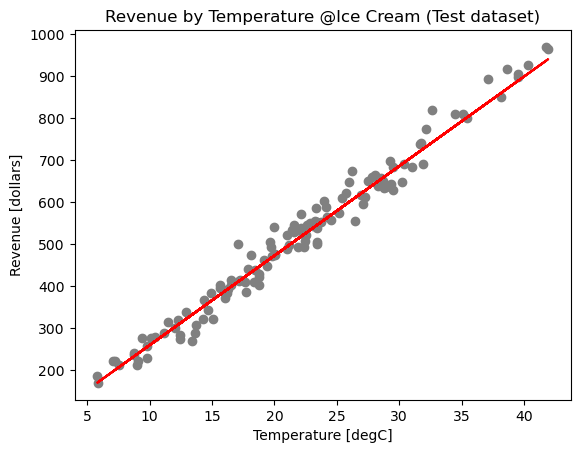

In [65]:
# no lets se how the line fits on the test data
plt.scatter(X_test, y_test_revenue, color = 'gray')
plt.plot(X_test, y_predict_revenue, color = 'red')
plt.ylabel('Revenue [dollars]')
plt.xlabel('Temperature [degC]')
plt.title('Revenue by Temperature @Ice Cream (Test dataset)')
plt.savefig("ML_scatterplot_test_data.jpg")

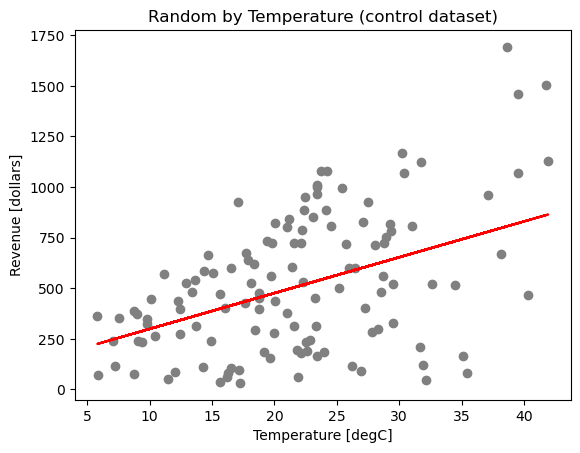

In [66]:
# check with non-relational data - controlling fitting on this non-relational data
plt.scatter(X_test, y_test_random, color = 'gray')
plt.plot(X_test, y_predict_random, color = 'red')
plt.ylabel('Revenue [dollars]')
plt.xlabel('Temperature [degC]')
plt.title('Random by Temperature (control dataset)')
plt.savefig("ML_scatterplot_random_data.jpg")

# Math vs. Machine Learning

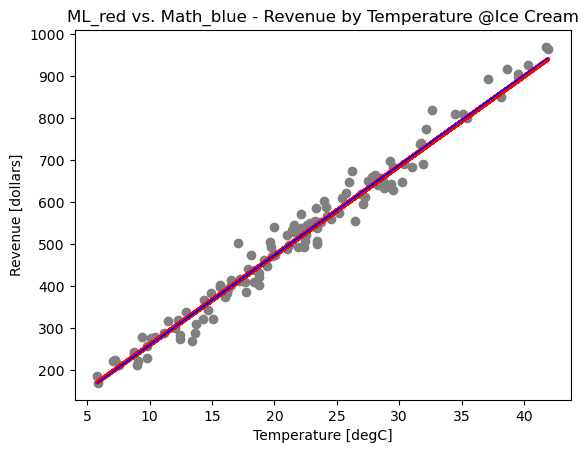

In [67]:
# we compare the machine learning method with the math method. Both are very close together...
plt.scatter(X_test, y_test_revenue, color = 'gray')
plt.plot(X_test, y_predict_revenue, color = 'red',linewidth=3)
plt.plot(X_test, reg_line_ice(X_test), color = 'blue',linewidth=0.5)
plt.ylabel('Revenue [dollars]')
plt.xlabel('Temperature [degC]')
plt.title('ML_red vs. Math_blue - Revenue by Temperature @Ice Cream')
plt.savefig("ML_red_vs_Math_blue_scatterplot.jpg", format = 'jpg')

## MSE comparison ML vs. Math

In [68]:
pd.array(y_test.iloc[:,0]).shape

(125,)

In [69]:
# MSE of math:
mse_math = round(st.mean((pd.array(y_test.iloc[:,0])-pd.array(reg_line_ice(X_test.squeeze())))**2),14)
mse_math
# MSE is more sensitive to outliers

789.4757738827332

In [70]:
# MSE of ML:
mse_ml=round(st.mean((pd.array(y_test.iloc[:,0])-pd.array(y_predict_revenue))**2),14)
mse_ml

805.4585764496197

## MAE comparison ML vs. Math

In [71]:
# MSA is just the mean over the absolute residual:
# data values differ in about this value at mean from linear regression
round(st.mean(abs(pd.array(y_test.iloc[:,0])-pd.array(reg_line_ice(X_test.squeeze())))),14)

22.02809135275992

In [72]:
# comparing MSA of the data with the MSA of the non-relational data
round(st.mean(abs(pd.array(y_test.iloc[:,0])-pd.array(y_predict_revenue))),14)

22.23814556011043

## Coefficient of Determination

In [73]:
y_predict_revenue

array([510.79542931, 507.08628297, 338.86245133, 837.92844701,
       691.31916918, 283.98752047, 380.49554273, 411.84966559,
       633.1299214 , 594.95990187, 638.96691607, 399.59964459,
       523.82983727, 518.09960931, 427.5850771 , 694.73659239,
       247.13763568, 610.52860324, 604.81578857, 545.55868748,
       437.72056409, 410.07970126, 255.85410785, 388.15673854,
       568.70607966, 467.72273225, 644.41910173, 505.77715079,
       423.72439166, 233.33032281, 525.85843643, 538.38485247,
       658.37444987, 446.81383182, 599.43298456, 742.52054359,
       262.40111445, 563.37080429, 351.20983023, 940.16071997,
       321.6628202 , 207.87699417, 255.21204238, 433.50401015,
       542.13757721, 674.62356013, 311.69981604, 352.60175808,
       391.78630937, 513.3842726 , 240.1129739 , 446.88410082,
       520.87062338, 545.92927354, 497.32959301, 888.77600017,
       474.01937189, 649.79531176, 583.57936775, 460.87281921,
       503.30729019, 399.55478546, 723.08543396, 802.07

In [74]:
test_DF = pd.DataFrame([pd.array(y_test.iloc[:,0]),pd.array(y_predict_revenue),pd.array(reg_line_ice(X_test.squeeze())),pd.array(X_test.squeeze())]).T
test_DF.columns = ['Revenue','ML','Math','Temperature']
test_DF.head()

,Revenue,ML,Math,Temperature
0,534.622865,510.795429,511.786541,21.775948
1,545.903929,507.086283,508.054143,21.601892
2,308.894518,338.862451,338.775765,13.707780
3,892.947720,837.928447,840.970260,37.127070
4,648.453609,691.319169,693.441931,30.247248


In [75]:
# coefficient of determination has a relation to the pearson coefficient by simple models
# for simple models like linear regression the coefficient of determination is the square pearson-coefficient
r = test_DF.corr()
r_sq = r**2
r_sq

,Revenue,ML,Math,Temperature
Revenue,1.000000,0.977415,0.977415,0.977415
ML,0.977415,1.000000,1.000000,1.000000
Math,0.977415,1.000000,1.000000,1.000000
Temperature,0.977415,1.000000,1.000000,1.000000


In [76]:
# making a copy of the data for merging mean and linear regression to the table and later getting back to original data
test_DF1 = test_DF.copy()

### Calculating the coefficient of determination with math

In [77]:
# first step of calculating the coefficient of determination: merging mean and linear regression to the table
test_DF1['mean_Revenue'] = test_DF1['Revenue'].mean()
test_DF1.head()

,Revenue,ML,Math,Temperature,mean_Revenue
0,534.622865,510.795429,511.786541,21.775948,513.874772
1,545.903929,507.086283,508.054143,21.601892,513.874772
2,308.894518,338.862451,338.775765,13.707780,513.874772
3,892.947720,837.928447,840.970260,37.127070,513.874772
4,648.453609,691.319169,693.441931,30.247248,513.874772


In [78]:
# So, the coefficient of determination is the portion that is distinct from mean at square residuals
# SQR: Sum of square residuals
SQR = sum((test_DF1['Revenue']-test_DF1['Math'])**2)
# TQS: Total sum of square of difference between the data and the the mean
TQS = sum((test_DF1['Revenue']-test_DF1['mean_Revenue'])**2)

In [79]:
# last step of calculating the coefficient of determination 
r_square_math = 1-SQR/TQS

In [80]:
# So, the coefficient of determination is the portion that is distinct from mean at square residuals
# SQR: Sum of square residuals
SQR = sum((test_DF1['Revenue']-test_DF1['ML'])**2)
# TQS: Total sum of square of difference between the data and the the mean
TQS = sum((test_DF1['Revenue']-test_DF1['mean_Revenue'])**2)

In [81]:
# last step of calculating the coefficient of determination 
r_square_ml = 1-SQR/TQS

In [82]:
r_square = pd.DataFrame([r_square_ml,r_square_math]).T
r_square.columns= ['ML','Math']
r_square

,ML,Math
0,0.976313,0.976783


In [83]:
# comparing the math calculation of the coefficient of determination with with the square pearson coefficient
r_sq

,Revenue,ML,Math,Temperature
Revenue,1.000000,0.977415,0.977415,0.977415
ML,0.977415,1.000000,1.000000,1.000000
Math,0.977415,1.000000,1.000000,1.000000
Temperature,0.977415,1.000000,1.000000,1.000000


## RMSE / Root mean square error

In [84]:
# RMSE = sqrt(MSE), math:
math.sqrt(mse_math)

28.09761153341567

In [85]:
# RMSE = sqrt(MSE), Ml:
math.sqrt(mse_ml)

28.38060211569902